In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Real_Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


In [5]:
df.shape

(1104, 8)

In [6]:
df.isnull().any()

T         False
TM        False
Tm        False
H         False
VV        False
V         False
VM        False
PM 2.5    False
dtype: bool

In [7]:
## Dividing into Independent and dependent feature
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

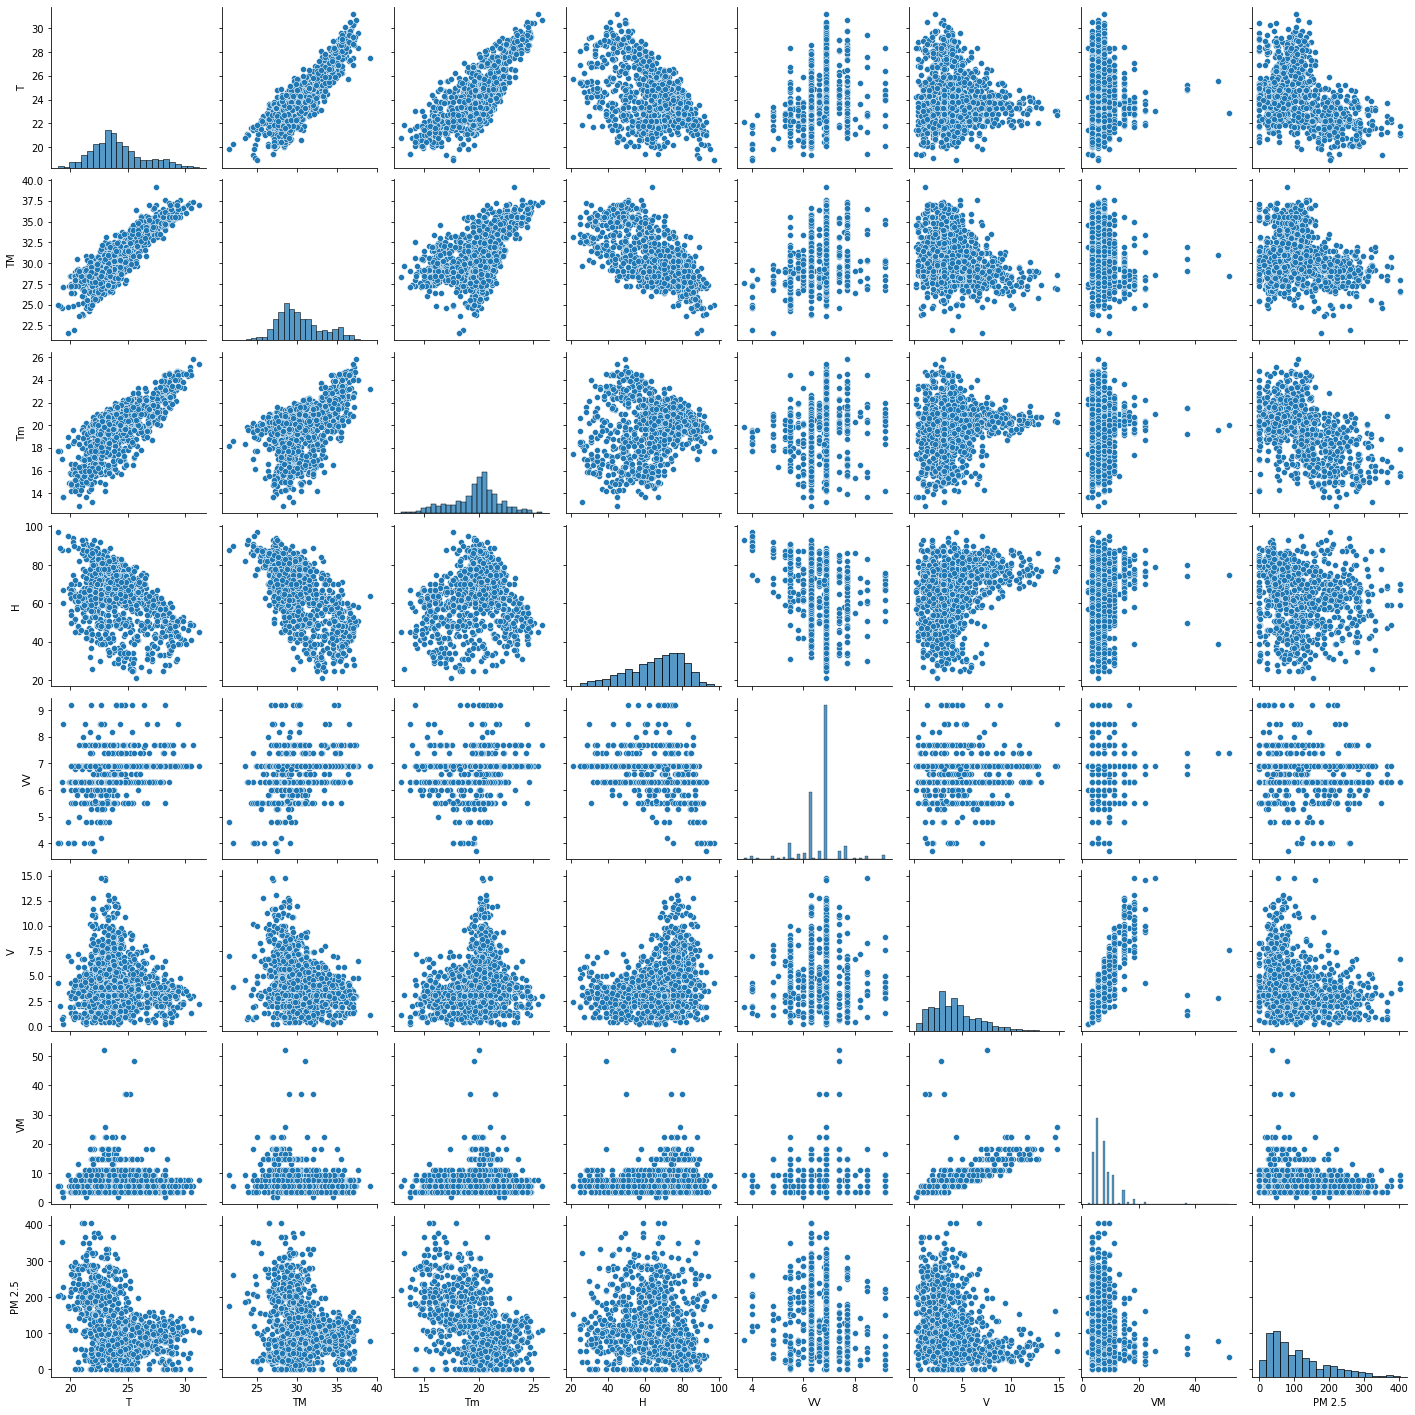

In [8]:
sns.pairplot(df)

In [9]:
df['VV'].min(),df['VV'].max()

(3.7, 9.2)

<AxesSubplot:>

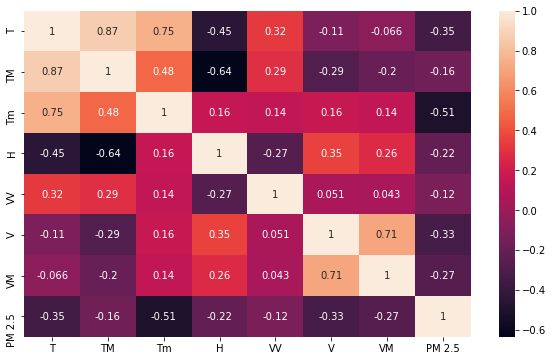

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

## Feature Importantance

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [12]:
X.head(1)

,T,TM,Tm,H,VV,V,VM
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4


In [13]:
print(model.feature_importances_)

[0.1851967  0.10501182 0.30796531 0.12681648 0.07004365 0.13582684
 0.06913919]


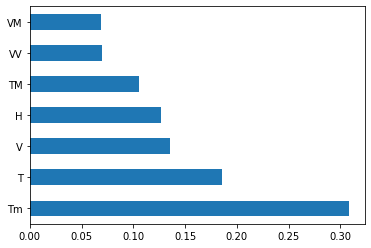

<Figure size 720x432 with 0 Axes>

In [14]:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.figure(figsize=(10,6))
plt.show()

<AxesSubplot:xlabel='PM 2.5', ylabel='Count'>

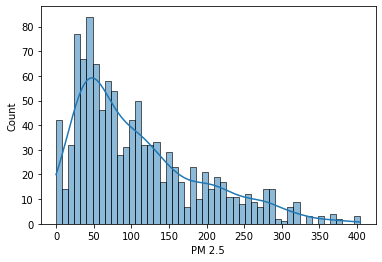

In [15]:
sns.histplot(y,bins=50,kde=True)

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((772, 7), (332, 7), (772,), (332,))

## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
regressor.score(X_train,y_train)

0.35906056802539243

In [21]:
regressor.score(X_test,y_test)

0.3569058609732354

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor,X,y,cv=6)

In [23]:
## Minimum, Avg and Max Scores
scores.min(),scores.mean(),scores.max()

(0.2178742302212563, 0.33070151368302875, 0.43494978816001206)

In [24]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,-18.892934
TM,-0.885373
Tm,-0.205687
H,-2.049704
VV,-5.214311
V,-7.636758
VM,-0.821739


In [25]:
pred = regressor.predict(X_test)

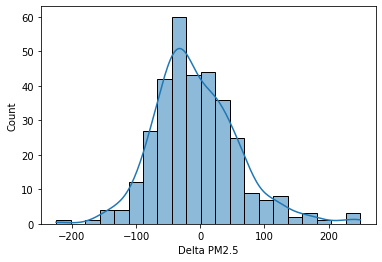

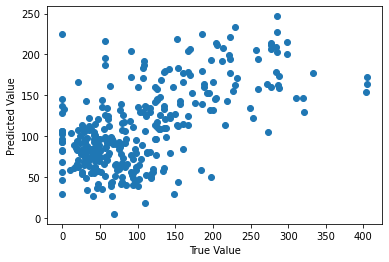

In [26]:
## How the error is distributed
sns.histplot(y_test-pred,kde=True)
plt.xlabel('Delta PM2.5')
plt.show()

plt.scatter(y_test,pred)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [32]:
### Other Evaluation Metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
print('MAE: ',mean_absolute_error(y_test,pred))
print('MSE: ',mean_squared_error(y_test,pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred)))

MAE:  51.577201464211285
MSE:  4358.140351357272
RMSE:  66.0162127916868


In [33]:
## Choosing negative MSE for cross validation

lin_reg = LinearRegression()
nmse = cross_val_score(lin_reg,X,y,scoring='neg_mean_squared_error',cv=5)
mean_nmse = np.mean(nmse)
print(mean_nmse)

-4578.411199719588


In [27]:
import pickle

In [28]:
file = open('model_linear_regression.pkl','wb')

pickle.dump(regressor,file)

## Ridge and Lasso Regression

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [49]:
ridge = Ridge()
parameters = {
    'alpha':[1e-15,1e-14,1e-13,1e-11,1e-10,1e-8,1e-3,1e-2,1,2,5,10,15,17,19,20,22,25,28,30,32,34,36]
}

ridge_regressor = GridSearchCV(ridge,
                               param_grid=parameters,
                               scoring='neg_mean_squared_error',
                               cv=5)

ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-14, 1e-13, 1e-11, 1e-10, 1e-08,
                                   0.001, 0.01, 1, 2, 5, 10, 15, 17, 19, 20, 22,
                                   25, 28, 30, 32, 34, 36]},
             scoring='neg_mean_squared_error')

In [50]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 36}
-4576.482472696631


## Lasso Regression

In [54]:
parameters = {
    'alpha':[1e-15,1e-14,1e-13,1e-11,1e-10,1e-8,1e-3,1e-2,1,2,5,10,15,17,19,20,22,25,28,30,32,34,36,40,50,75,100,125,150,175,200,225]
}

lasso_regressor = GridSearchCV(ridge,
                               param_grid=parameters,
                               scoring='neg_mean_squared_error',
                               cv=5)

lasso_regressor.fit(X,y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 100}
-4575.820940318192


<AxesSubplot:xlabel='PM 2.5', ylabel='Count'>

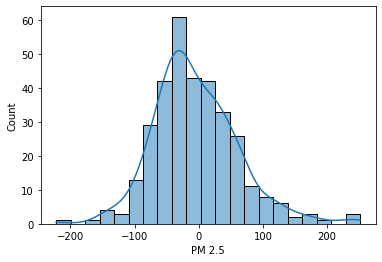

In [55]:
pred = lasso_regressor.predict(X_test)
sns.histplot(y_test-pred,kde=True)

In [57]:
### Other Evaluation Metrics

print('MAE: ',mean_absolute_error(y_test,pred))
print('MSE: ',mean_squared_error(y_test,pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred)))

MAE:  51.163970285521685
MSE:  4332.243758366974
RMSE:  65.81978242418441


In [59]:
file = open('model_lasso_regression.pkl','wb')

pickle.dump(lasso_regressor,file)

## Decision Tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
## Model is performing worse due to overfitting
dtree = DecisionTreeRegressor()

scores = cross_val_score(dtree,X,y,cv=5)
print(scores.mean())

-0.2220531992250611


In [69]:
params = {
    'criterion' : ['mse','friedman_mse','mae','poisson'],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
    'min_samples_leaf' : [1,2,3,4,5,6],
    'min_weight_fraction_leaf' : [0.1,0.2,0.3,0.4,0.5],
    'max_features' : ['auto','sqrt','log2',None],
    'max_leaf_nodes' : [None,5,10,20,30,40,50,60,70]
}

dtree_regressor = GridSearchCV(dtree,
                               param_grid=params,
                               scoring='neg_mean_squared_error',
                               cv=5,
                               n_jobs=-1,
                               verbose=3)

dtree_regressor.fit(X,y)

print(dtree_regressor.best_params_)
print(dtree_regressor.best_score_)

Fitting 5 folds for each of 138240 candidates, totalling 691200 fits
{'criterion': 'mse', 'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
-4265.12908056869


<AxesSubplot:xlabel='PM 2.5', ylabel='Count'>

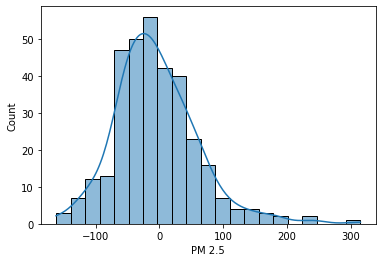

In [70]:
pred = dtree_regressor.predict(X_test)
sns.histplot(y_test-pred,kde=True)

In [71]:
### Other Evaluation Metrics

print('MAE: ',mean_absolute_error(y_test,pred))
print('MSE: ',mean_squared_error(y_test,pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred)))

MAE:  49.94599007983189
MSE:  4332.844461096844
RMSE:  65.824345504508


In [72]:
file = open('dtree_regression.pkl','wb')

pickle.dump(dtree_regressor,file)

## RandomForest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [80]:
params = {
    'n_estimators' : [10,20,50,70,100,120,150,175,200,250,300,500,1000,1200],
    'criterion' : ['mse','mae'],
    'max_depth' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
    'min_samples_split' : [2,3,10,30,40,50],
    'min_samples_leaf' : [1,2,3,5,7,10,15,20,22],
    'min_weight_fraction_leaf' : [0.1,0.2,0.3,0.4,0.5],
    'max_features' : ['sqrt','log2',None],
     'max_leaf_nodes' : [None,5,10,20,30,40,50,60,70]
}

rf = RandomForestRegressor()

rf_regressor = RandomizedSearchCV(rf,
                               param_distributions=params,
                               n_iter=1000,
                               scoring='neg_mean_squared_error',
                               cv=5,
                               n_jobs=-1,
                               verbose=3)

rf_regressor.fit(X,y)

print(rf_regressor.best_params_)
print(rf_regressor.best_score_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
{'n_estimators': 20, 'min_weight_fraction_leaf': 0.1, 'min_samples_split': 30, 'min_samples_leaf': 10, 'max_leaf_nodes': 10, 'max_features': None, 'max_depth': 7, 'criterion': 'mse'}
-4175.563325870371


MAE:  46.65776869947242
MSE:  3873.285536987728
RMSE:  62.23572556809897


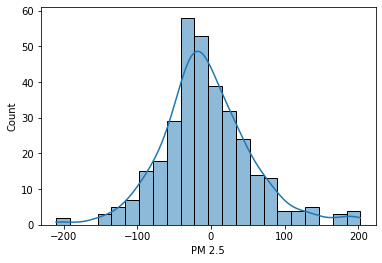

In [81]:
pred = rf_regressor.predict(X_test)
sns.histplot(y_test-pred,kde=True)

### Other Evaluation Metrics
print('MAE: ',mean_absolute_error(y_test,pred))
print('MSE: ',mean_squared_error(y_test,pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred)))

In [82]:
file = open('random_forest_regression.pkl','wb')

pickle.dump(rf_regressor,file)

## XGBoost

In [84]:
from xgboost import XGBRegressor

In [86]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
print('Coeff of R2 on train: ',xgb.score(X_train,y_train))
print('Coeff of R2 on test: ',xgb.score(X_test,y_test))

Coeff of R2 on train:  0.9980172972095065
Coeff of R2 on test:  0.2698629105921758


In [88]:
scores = cross_val_score(xgb,X,y,scoring='neg_mean_squared_error',cv=5)
print(scores.mean())

-5328.548593028927


In [89]:
import xgboost
print(xgboost.__version__)

1.3.3


In [90]:
### Hypertuning

params = {
    'n_estimators' : [10,20,50,70,100,120,150,175,200,250,300,500,1000,1200],
    'max_depth' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
    'learning_rate' : [0.001,0.01,0.1,0.5,1.,5.],
    'gamma' : [None,0.001,0.01,0.1,1.,2.,5.],
    'subsample' : [0.6,0.7,0.8,0.9],
    'min_child_weight' : [3,4,5,6,7,8]
}

xgb = XGBRegressor()

xgb_regressor = RandomizedSearchCV(xgb,
                               param_distributions=params,
                               n_iter=200,
                               scoring='neg_mean_squared_error',
                               cv=5,
                               n_jobs=-1,
                               verbose=2)

xgb_regressor.fit(X,y)

print(xgb_regressor.best_params_)
print(xgb_regressor.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


D:\My_Installed_Soft\Anacondaa\envs\Air Quality\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.55097976e+04 -6.20733521e+03 -6.20945114e+03             nan
 -1.38394889e+04 -1.11489723e+04 -6.43728730e+03 -4.99195207e+03
 -1.21831789e+04 -5.97149415e+27 -4.89415982e+03 -5.22795117e+03
 -6.91646742e+03 -5.03424505e+03 -5.45362279e+03             nan
 -4.78920908e+03             nan             nan -9.80605042e+03
 -1.54978756e+04 -5.73712621e+03 -4.46807565e+03 -4.37545562e+03
             nan -6.52248050e+03 -5.72849614e+03 -5.28010173e+03
 -1.48844388e+04 -6.84659538e+03 -1.71634469e+04 -6.18744042e+03
 -5.07674604e+03 -9.47889702e+03 -5.93861070e+03 -5.81818959e+03
             nan -5.54067288e+03 -1.82294776e+04 -8.30629675e+03
 -5.89030782e+03 -8.51937362e+03 -4.79025574e+03 -6.41623113e+03
 -1.38873212e+04             nan             nan -9.59115893e+03
 -6.23736272e+03 -1.30065152e+04 -8.16572307e+03 -5.16

{'subsample': 0.9, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 5.0}
-4183.334170187439


MAE:  42.33709693816771
MSE:  3197.0878962918273
RMSE:  56.54279703279479


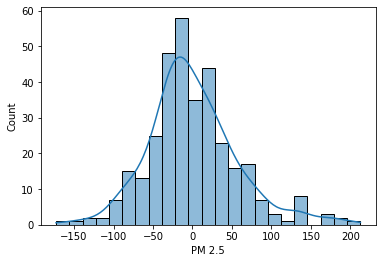

In [91]:
pred = xgb_regressor.predict(X_test)
sns.histplot(y_test-pred,kde=True)

### Other Evaluation Metrics
print('MAE: ',mean_absolute_error(y_test,pred))
print('MSE: ',mean_squared_error(y_test,pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred)))

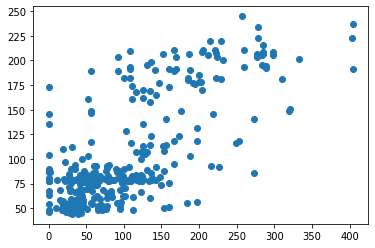

In [102]:
plt.scatter(y_test,pred)

In [97]:
file = open('xgb_regression.pkl','wb')

pickle.dump(xgb_regressor,file)